# Neural Network Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another(there can be multiple things to calssify as well).

### [Resource](https://www.learnpytorch.io/02_pytorch_classification/)

## 1. Prepare Classification Data
### [Scikit-learn Toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html)

In [1]:
import sklearn
from sklearn.datasets import make_circles

# Sampling 1000 data
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

len(X), len(y)

(1000, 1000)

In [2]:
X, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [3]:
# Make dataframe of circle data
import pandas as pd

circles = pd.DataFrame({'X1': X[:, 0],
                        'X2': X[:, 1],
                        'label': y})

circles.sample(5)

,X1,X2,label
997,-0.136900,-0.810012,1
72,0.355638,0.692264,1
355,-0.105048,1.016041,0
221,-0.810174,0.160898,1
860,0.015745,-1.029985,0


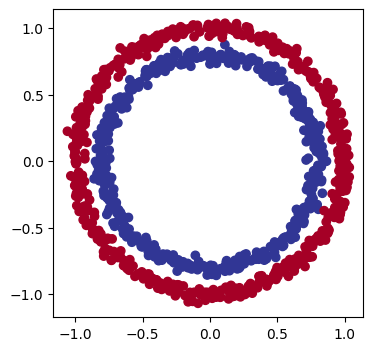

In [4]:
# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap = plt.cm.RdYlBu);

*Note: The data we're working with is often referred to as a [toy dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html), a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.*

In [5]:
# Check input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
print(f'X[0]:{X[0]}\ny[0]:{y[0]}')
print(f'Shape of X[0]:{X[0].shape}\nShape of y[0]:{y[0].shape}')

X[0]:[0.75424625 0.23148074]
y[0]:1
Shape of X[0]:(2,)
Shape of y[0]:()


### Turn Data into Tensors

In [7]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

print(torch.__version__)

# Seting device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

2.1.0+cu121
cuda


In [8]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [9]:
X = torch.from_numpy(X).type(torch.float)   # float is default for float32
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [10]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

### Random data split into training and test sets

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,  # 80%: train | 20% test
                                                    random_state = 42)

In [12]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [13]:
X_train.shape

torch.Size([800, 2])

## 2. Building a model
- Build a model to classify blue and red dots
  - Use subclass `nn.Module` to create PyTorch modules
  - Create two `nn.Linear` layers capable of handling shapes of our data
  - Define `forward()` method that outlines the forward computation of the model
  - Instantiate an instance of model class and send it to target `device`
- Define loss function and optimizer
- Create a training & test loop
  

In [14]:
# Define subclass nn.Module
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    # Create two nn.Linear layers
    self.layer_1 = nn.Linear(in_features = 2,     # takes 2 input features (must be same shape as X)
                             out_features = 8)    # upscales to 8 features (hidden neurons)
    self.layer_2 = nn.Linear(in_features = 8,     # takes 8 features from previous layer (hidden neurons)
                             out_features = 1)    # outputs a single feature (must be same shape as y)

  # Define forward method
  def forward(self, x):
    return self.layer_2(self.layer_1(x))    # x(data) -> layer_1(computation) ->layer_2(computation) -> final_output

In [15]:
# Instantiate instance of model class
model = CircleModel().to(device)
model

CircleModel(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=1, bias=True)
)

In [16]:
next(model.parameters()).device

device(type='cuda', index=0)

In [17]:
# Replicate the model using nn.Sequential
# [Easier way but its better to create class model]
model = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 8),
    nn.Linear(in_features = 8, out_features = 1)
).to(device)

model

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)

In [18]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3842,  0.4783],
                      [-0.0313,  0.6256],
                      [ 0.4820, -0.5343],
                      [-0.3081,  0.2594],
                      [ 0.1845, -0.4051],
                      [-0.4926, -0.0182],
                      [ 0.2992, -0.6848],
                      [-0.0047, -0.1538]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.0436, -0.2349,  0.1911,  0.2155, -0.1160,  0.5339,  0.2546,  0.1021],
                     device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0774,  0.0304, -0.2566,  0.0335,  0.2516, -0.2032, -0.2703, -0.2219]],
                     device='cuda:0')),
             ('1.bias', tensor([0.2050], device='cuda:0'))])